# 机器学习
机器学习一般分为以下类别：
* 监督学习 （Supervised Learning）
* 无监督学习 （Unsupervised Learning）
* 强化学习（Reinforcement Learning，增强学习）
* 半监督学习（Semi-supervised Learning）
* 深度学习 (Deep Learning)

## Scikit—learn常用函数
* 分类（Classification）应用于异常检测，图像识别等，算法：KNN, SVM...
* 聚类（Clustering）应用于图像分割，群体划分等，算法：K-Means，谱聚类...
* 回归（Regression）应用于价格预测，趋势预测等，算法：线性回归，SVR...
* 降维（Dimension Reduction）应用于可视化，算法：PCA，NMF...

## Sklearn标准数据集
1. 小数据集如下
    * 波士顿房价数据集 load_boston() 回归 506*13
    * 鸢尾花数据集 load_iris() 分类 150*4
    * 糖尿病数据集 load_diabetes() 回归 442*10
    * 手写数字数据集 load_digits() 分类 5620*64
2. 大数据集如下
    * Olivetti 脸部图像数据集 fetch_olivetti_faces() 降维 400*64*64
    * 新闻分类数据集 fetch_20newsgroups() 分类-
    * 带标签的人脸数据集 fetch_lfw_people() 分类；降维-
    * 路透社新闻语料数据集 fetch_rcv1() 分类 804414*47236
小数据集可以直接使用，大数据集要在调用时程序自动下载（一次即可）。

## Sklearn库的基本功能
sklearn库的共分为6大部分，分别用于完成分类任务、回归任务、聚类任务、降维任务、模型选择以及数据的预处理。
* 一、分类任务：（分类模型 加载模块）
    * 最近邻算法 neighbors.NearestNeighbors
    * 支持向量机 svm.SVC
    * 朴素贝叶斯 naive_bayes.GaussianNB
    * 决策树 tree.DecisionTreeClassifier
    * 集成方法 ensemble.BaggingClassifier
    * 神经网络 neural_network.MLPClassifier
* 二、回归任务：（回归模型 加载模块）
    * 岭回归 linear_model.Ridge
    * Lasso回归 linear_model.Lasso
    * 弹性网络 linear_model.ElasticNet
    * 最小角回归 linear_model.Lars
    * 贝叶斯回归 linear_model.BayesianRidge
    * 逻辑回归 linear_model.LogisticRegression
    * 多项式回归 preprocessing. PolynomialFeatures
* 三、聚类任务：（聚类方法 加载模块）
    * K-means cluster.KMeans
    * AP聚类 cluster.AffinityPropagation
    * 均值漂移 cluster.MeanShift
    * 层次聚类 cluster.AgglomerativeClustering
    * DBSCAN cluster.DBSCAN
    * BIRCH cluster.Birch
    * 谱聚类 cluster.SpectralClustering
* 四、降维任务：（降维方法 加载模块）
    * 主成分分析 decomposition.PCA
    * 截断SVD和LSA decomposition.TruncatedSVD
    * 字典学习 decomposition.SparseCoder
    * 因子分析 decomposition.FactorAnalysis
    * 独立成分分析 decomposition.FastICA
    * 非负矩阵分解 decomposition.NMF
    * LDA decomposition.LatentDirichletAllocation

## 无监督学习——聚类
k-means算法以k为参数，把n个对象分成k个簇，使簇内具有较高的相似度，而簇间的相似度较低。
* 其处理过程如下：
    1. 随机选择k个点作为初始的聚类中心；
    2. 对于剩下的点，根据其与聚类中心的距离，将其归入最近的簇
    3. 对每个簇，计算所有点的均值作为新的聚类中心
    4. 重复2、3直到聚类中心不再发生改变
* 数据介绍：
    现有1999年全国31个省份城镇居民家庭平均每人全年消费性支出的八个主要变量数据，这八个变量分别是：食品、衣着、家庭设备用品及服务、医疗保健、交通和通讯、娱乐教育文化服务、居住以及杂项商品和服务。利用已有数据，对31个省份进行聚类。
* 实验目的：
    通过聚类，了解1999年各个省份的消费水平在国内的情况。

In [8]:
import numpy as np
from sklearn.cluster import KMeans

def loadData(filePath):
    fr = open(filePath,'r+') # r+读写打开一个文本文件
    lines = fr.readlines()
    '''
    .read() 每次读取整个文件，它通常用于将文件内容放到一个字符串变量中
    .readlines() 一次读取整个文件（类似于.read() )
    .readline() 每次只读取一行，通常比.readlines() 慢得多。
    仅当没有足够内存可以一次读取整个文件时，才应该使用.readline()。
    '''
    retData = [] # 存储城市各项消费信息
    retCityName = [] # 存储城市名
    for line in lines:
        items = line.strip().split(",")
        retCityName.append(items[0])
        retData.append(
            [
                float(items[i]) for i in range(1,len(items))
                ]
            )
    return retData,retCityName

if __name__ == '__main__':
    data,cityName = loadData('city.txt') # data是一个宽度为8的数组
    print(data)
    km = KMeans(n_clusters = 4)
    '''
    调用KMeans方法所需参数：
    • n_clusters：用于指定聚类中心的个数，即K值
    • init：初始聚类中心的初始化方法，可以为完全随机选择random、优化过的K-means++或者自己指定初始化的K个质心。一般建议使用默认的K-means++。
    • max_iter：最大的迭代次数
    • 一般调用时只用给出n_clusters即可，init默认是k-means++，max_iter默认是300
    • algorithm：有auto、full和elkan三种选择。full就是传统的K-means算法，elkan是elkan K-means算法。默认是auto，则会根据数据是否稀疏，来决定如何选择full和elkan。一般数据是稠密的，那么就是elkan，否则就是full。一般建议直接使用默认的auto。
    KMeans方法的主要属性：
    • cluster_centers_：每个簇质心的坐标。
    • labels_： 簇标签。
    • inertia_： 每个点到其簇质心的距离之和。
    其它参数：
    • fit_predict()：计算簇中心以及为簇分配序号
    '''
    label = km.fit_predict(data) # 聚类后各数据所属的标签,list[int]格式
    print('label:',label)
    expenses = np.sum(km.cluster_centers_,axis=1) # axis: 按行求和,计算各项消费均值加总
    print('expenses:',expenses)
    CityCluster = [[],[],[],[]]
    for i in range(len(cityName)):
        CityCluster[label[i]].append(cityName[i]) # 按标签分类城市
    for i in range(len(CityCluster)):
        print("Expenses:%.2f" % expenses[i])
        print(CityCluster[i])


[[2959.19, 730.79, 749.41, 513.34, 467.87, 1141.82, 478.42, 457.64], [2459.77, 495.47, 697.33, 302.87, 284.19, 735.97, 570.84, 305.08], [1495.63, 515.9, 362.37, 285.32, 272.95, 540.58, 364.91, 188.63], [1406.33, 477.77, 290.15, 208.57, 201.5, 414.72, 281.84, 212.1], [1303.97, 524.29, 254.83, 192.17, 249.81, 463.09, 287.87, 192.96], [1730.84, 553.9, 246.91, 279.81, 239.18, 445.2, 330.24, 163.86], [1561.86, 492.42, 200.49, 218.36, 220.69, 459.62, 360.48, 147.76], [1410.11, 510.71, 211.88, 277.11, 224.65, 376.82, 317.61, 152.85], [3712.31, 550.74, 893.37, 346.93, 527.0, 1034.98, 720.33, 462.03], [2207.58, 449.37, 572.4, 211.92, 302.09, 585.23, 429.77, 252.54], [2629.16, 557.32, 689.73, 435.69, 514.66, 795.87, 575.76, 323.36], [1844.78, 430.29, 271.28, 126.33, 250.56, 513.18, 314.0, 151.39], [2709.46, 428.11, 334.12, 160.77, 405.14, 461.67, 535.13, 232.29], [1563.78, 303.65, 233.81, 107.9, 209.7, 393.99, 509.39, 160.12], [1675.75, 613.32, 550.71, 219.79, 272.59, 599.43, 371.62, 211.84], [1

## DBSCAN算法
* DBSCAN算法是一种基于密度的聚类算法：
    * 聚类的时候不需要预先指定簇的个数
    * 最终的簇的个数不定
* DBSCAN算法将数据点分为三类：
    * 核心点：在半径Eps内含有超过MinPts数目的点
    * 边界点：在半径Eps内点的数量小于MinPts，但是落在核心点的邻域内
    * 噪音点：既不是核心点也不是边界点的点
* DBSCAN算法流程：
    1. 将所有点标记为核心点、边界点或噪声点；
    2. 删除噪声点；
    3. 为距离在Eps之内的所有核心点之间赋予一条边；
    4. 每组连通的核心点形成一个簇；
    5. 将每个边界点指派到一个与之关联的核心点的簇中（哪一个核心点的半径范围之内）。
* 数据介绍：</br>
    现有大学校园网的日志数据，290条大学生的校园网使用情况数据，数据包括用户ID，设备的MAC地址，IP地址，开始上网时间，停止上网时间，上网时长，校园网套餐等。利用已有数据，分析学生上网的模式。
* 实验目的：</br>
    通过DBSCAN聚类，分析学生上网时间和上网时长的模式。
* 数据格式如下：</br>
    <table>
    <tr><td>记录编号</td> <td>2c929293466b97a6014754607e457d68</td></tr>
    <tr><td>学生编号</td> <td> U201215025</td></tr>
    <tr><td>MAC地址</td> <td> A417314EEA7B</td></tr>
    <tr><td>IP地址 </td> <td>10.12.49.26</td></tr>
    <tr><td>开始上网时间 </td> <td>2014-07-20 22:44:18.540000000</td></tr>
    <tr><td>停止上网时间</td> <td> 2014-07-20 23:10:16.540000000</td></tr>
    <tr><td>上网时长 </td> <td>1558</td></tr>
    </table>

onlinetimes: [(12, 40261), (22, 1721), (23, 351), (16, 23564), (23, 1162), (22, 3540), (23, 641), (20, 10365), (19, 15906), (23, 6), (22, 4461), (23, 118), (23, 160), (21, 8156), (18, 17774), (16, 24332), (21, 6010), (18, 16480), (23, 1116), (23, 974), (17, 20232), (23, 649), (21, 5751), (8, 55244), (16, 25454), (23, 55), (23, 57), (20, 10887), (22, 3561), (20, 10499), (20, 9163), (15, 30190), (22, 3524), (23, 0), (22, 2935), (22, 4666), (22, 2405), (23, 861), (21, 6483), (15, 27275), (22, 4271), (23, 440), (23, 258), (22, 1663), (22, 2187), (20, 10972), (19, 14835), (23, 502), (21, 7033), (23, 34), (14, 33379), (21, 6411), (14, 31535), (21, 6124), (22, 2027), (23, 168), (23, 1136), (20, 9920), (21, 8484), (21, 7931), (10, 46898), (19, 15054), (18, 16808), (22, 2457), (23, 550), (20, 10786), (23, 77), (19, 15239), (21, 7722), (23, 1518), (23, 960), (20, 12406), (21, 6475), (22, 1792), (23, 580), (15, 28821), (20, 66), (22, 3785), (22, 4275), (21, 5737), (20, 10404), (22, 1799), (23, 16

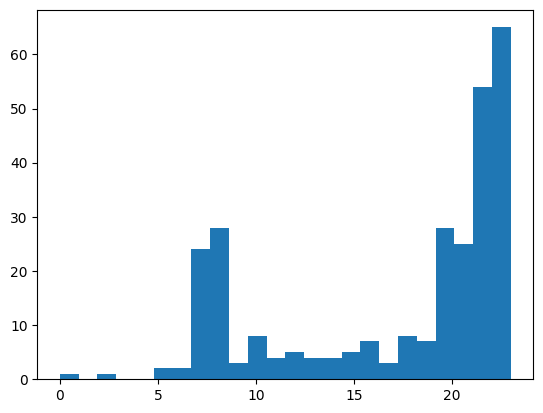

In [3]:
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

mac2id=dict()
onlinetimes=[]
f=open('mac.txt',encoding='utf-8')
for line in f:
    mac=line.split(',')[2]
    onlinetime=int(line.split(',')[6])
    starttime=int(line.split(',')[4].split(' ')[1].split(':')[0])
    if mac not in mac2id:
        mac2id[mac]=len(onlinetimes) # mac2id是一个给mac编id的字典
        onlinetimes.append((starttime,onlinetime)) #onlinetimes是一个包含（开始时间、在线时间）元组的列表
    else:
        onlinetimes[mac2id[mac]]=[(starttime,onlinetime)] # 确保mac和元组准确以序号映射
real_X=np.array(onlinetimes).reshape((-1,2)) 
'''
1. np.array(onlinetimes) 将 onlinetimes 列表转换为 NumPy 数组
    onlinetimes 是一个包含二元组（starttime 和 onlinetime）的列表，
    例如 [(starttime1, onlinetime1), (starttime2, onlinetime2), ...]。
    np.array(onlinetimes) 将这个列表转换为一个 NumPy 数组。
    这一步的结果是一个二维数组，其中每一行对应列表中的一个二元组。
2..reshape((-1,2))重新形状为二维数组
    reshape 方法用于改变 NumPy 数组的形状。
    这里的参数 (-1, 2) 表示将数组重新形状为有两列的二维数组。
    -1 是一个特殊值，表示这个维度的大小由数据的总大小和其他维度的大小自动推算得出。
这句代码的作用是确保 onlinetimes 转换为一个具有两列的 NumPy 二维数组，方便后续的聚类分析。
-1 的使用使得代码更具通用性，因为它可以适应不同数量的样本，只要每个样本包含两个数据点。
'''
# 调用DBSCAN方法进行训练，labels为每个数据的簇标签
'''
DBSCAN主要参数：
    eps: 两个样本被看作邻居节点的最大距离
    min_samples: 簇的样本数
    metric：距离计算方式
'''
X=real_X[:,0:1] 
'''
使用了切片操作来选择数组的第一列（starttime），并保持二维数组的结构。
    : 表示选择所有的行。
    0:1 表示选择第0列并保持二维数组的结构。
'''
db=skc.DBSCAN(eps=0.01,min_samples=20).fit(X) # .fit(X) 方法对数据 X 进行聚类训练。
labels = db.labels_ 
'''
db.labels_ 是训练好的DBSCAN模型的一个属性，包含每个样本的聚类标签。
如果某个样本被标记为噪声点，其标签为 -1。其他样本的标签为整数，表示它们所属的簇。
'''
print('Labels:')
print(labels)
raito=len(labels[labels[:] == -1]) / len(labels) # 计算噪音点比例
print('Noise raito:',format(raito, '.2%'))
#set(labels) 将标签转换为集合，这会移除重复的标签值，只保留唯一值。
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
'''
计算轮廓系数:
    轮廓系数的值范围是 -1 到 1，值越大表示聚类效果越好。具体来说：
    轮廓系数接近 1 表示样本非常好地聚类。
    轮廓系数接近 0 表示样本在聚类边界上。
    轮廓系数接近 -1 表示样本可能被错误地聚类。
'''
for i in range(n_clusters_):
    print('Cluster ',i,':')
    print(list(X[labels == i].flatten()))
    '''
    .flatten() 方法将多维数组转换为一维数组 
    这行代码的主要功能是通过以下步骤打印属于每个簇的样本数据：
    1.使用布尔索引选择属于第 i 个簇的样本。
    2.将选中的样本数据展平为一维数组。
    3.将展平后的数组转换为 Python 列表。
    '''
plt.hist(X,24) # 绘制一个24柱（区域）的直方图
plt.show()

## 无监督学习-降维——主成分分析（PCA）
* 主成分分析（Principal Component Analysis，PCA）是最常用的一种降维方法，通常用于高维数据集的探索与可视化，还可以用作数据压缩和预处理等。
    * PCA可以把具有相关性的高维变量合成为线性无关的低维变量，称为主成分。主成分能够尽可能保留原始数据的信息。
    * 原理：矩阵的主成分就是其协方差矩阵对应的特征向量，按照对应的特征值大小进行排序，最大的特征值就是第一主成分，其次是第二主成分，以此类推。
* 在sklearn库中，可以使用sklearn.decomposition.PCA加载PCA进行降维，主要参数有：
    * n_components：指定主成分的个数，即降维后数据的维度
    * svd_solver ：设置特征值分解的方法，默认为‘auto’,其他可选有‘full’, ‘arpack’, ‘randomized’。
* PCA实现高维数据可视化
    * 目标：已知鸢尾花数据是4维的，共三类样本。使用PCA实现对鸢尾花数据进行降维，实现在二维平面上的可视化。

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


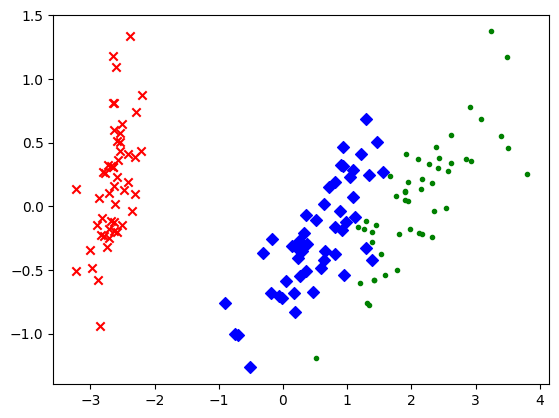

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris() # 以字典形式加载鸢尾花数据集
y = data.target # 使用y表示数据集中的标签
print(y)
X = data.data # 使用X表示数据集中的属性数据
pca = PCA(n_components = 2) # 加载PCA算法，设置降维后主成分数为2
reduced_X = pca.fit_transform(X) # 对原始数据进行降维，保存在reduced_X中

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c = 'r', marker = 'x')
plt.scatter(blue_x, blue_y, c = 'b', marker = 'D')
plt.scatter(green_x, green_y, c = 'g', marker = '.')
plt.show()

## 无监督学习-降维——非负矩阵分解（NMF）
* 非负矩阵分解（Non-negative Matrix Factorization ，NMF）是在矩阵中所有元素均为非负数约束条件之下的矩阵分解方法。
* 基本思想：给定一个非负矩阵V，NMF能够找到一个非负矩阵W和一个非负矩阵H，使得矩阵W和H的乘积近似等于矩阵V中的值。
    * W矩阵：基础图像矩阵，相当于从原矩阵V中抽取出来的特征
    * H矩阵：系数矩阵。
* NMF能够广泛应用于图像分析、文本挖掘和语音处理等领域。
* 矩阵分解优化目标：最小化W矩阵H矩阵的乘积和原始矩阵之间的差别，目标函数如下：

* 在sklearn库中，可以使用sklearn.decomposition.NMF加载NMF算法，主要参数有：
    * n_components：用于指定分解后矩阵的单个维度k；
    * init：W矩阵和H矩阵的初始化方式，默认为‘nndsvdar’。
* 目标：已知Olivetti人脸数据共400个，每个数据是64*64大小。
* 由于NMF分解得到的W矩阵相当于从原始矩阵中提取的特征，那么就可以使用NMF对400个人脸数据进行特征提取。
* 通过设置k的大小，设置提取的特征的数目。在本实验中设置k=6，随后将提取的特征以图像的形式展示出来。

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/kataru/scikit_learn_data
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
(400, 4096)
Extracting the top 6 Non-negative components - NMF...
(400, 4096)


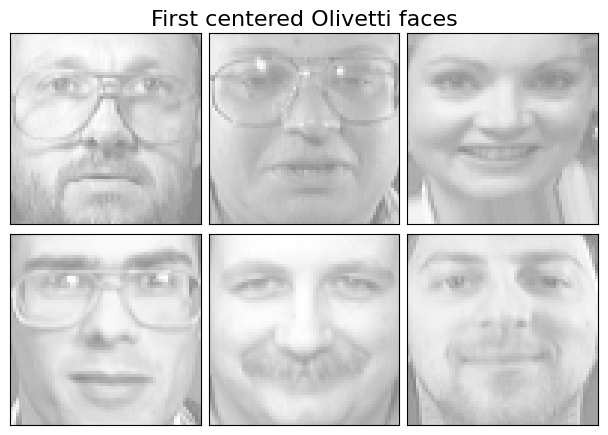

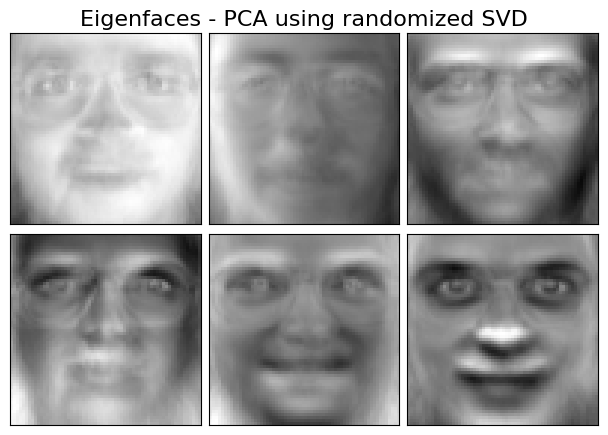

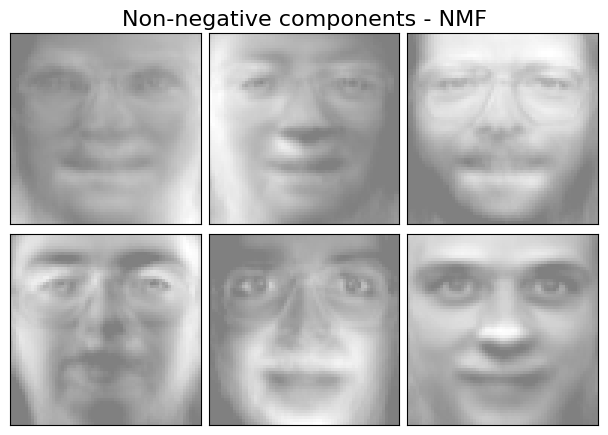

In [7]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces # #加载Olivetti人脸数据集导入函数
from sklearn import decomposition # 加载RandomState用于创建随机种子

n_row, n_col = 2, 3 # 设置图像展示时的排列情况2行3列
n_components = n_row * n_col # 设置提取的特征数目
image_shape = (64, 64) #设置人脸数据图片的大小

###############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=RandomState(0))
faces = dataset.data

###############################################################################
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    # plt.figure：创建一个新的图像画布，figsize 参数设置画布的大小。
    plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    # plt.suptitle：设置整个图像集合的标题（titke,size = )
    plt.suptitle(title, size=16) 

    for i, comp in enumerate(images): # enumerate(images)：遍历图像列表 images，并为每个图像提供索引 i 和图像数据 comp。
        plt.subplot(n_row, n_col, i + 1) # plt.subplot(n_row, n_col, i + 1)：在指定的行数和列数的网格中创建一个子图，i + 1 表示子图的位置。
        vmax = max(comp.max(), -comp.min()) # vmax = max(comp.max(), -comp.min())：计算图像数据的最大绝对值，用于确定图像显示的动态范围。

        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        '''
        plt.imshow：显示图像数据。
            comp.reshape(image_shape)：将图像数据重新形成为指定的图像大小（例如 64x64 像素）。
            cmap=plt.cm.gray：使用灰度色彩图显示图像。
            interpolation='nearest'：使用最近邻插值法来显示图像。
            vmin=-vmax, vmax=vmax：设置图像显示的颜色范围，确保图像的对比度适中。'''
        plt.xticks(()) # 隐藏图像的 x 轴和 y 轴刻度，以便获得更清晰的图像展示。
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04, 0.)
    '''
    .subplots_adjust：调整子图在画布上的布局参数。
    0.01, 0.05, 0.99, 0.94：分别设置图像集合的左、底、右、顶边距。
    0.04, 0.：设置子图之间的水平和垂直间距。'''
    
# 使用 plot_gallery 函数显示数据集中的前 n_components 张图像。
plot_gallery("First centered Olivetti faces", faces[:n_components])
###############################################################################

estimators = [
    ('Eigenfaces - PCA using randomized SVD',
         decomposition.PCA(n_components=6,whiten=True)),
    # NMF（非负矩阵分解）：将数据分解为基于部件的表示，限制为非负值。
    ('Non-negative components - NMF',
         decomposition.NMF(n_components=6, init='nndsvda', tol=5e-3))
]
'''
    PCA（主成分分析）：通过找到最大方差的方向来降低维度（应用于人脸时称为“Eigenfaces”）。
        n_components=6：指定要提取的主成分数量为 6。这意味着将原始数据降维到 6 个特征，这些特征捕捉了数据中最大方差的方向。
        whiten=True：启用白化过程，该过程将使得每个特征具有单位方差。这有助于去除特征间的线性相关性，使得结果更加适合于后续的机器学习任务。

    decomposition.NMF：调用 scikit-learn 库中的 NMF 类。
        n_components=6：指定要提取的成分数量为 6。每个成分代表原始数据的一个非负特征。
        init='nndsvda'：初始化策略为非负双奇异值分解（NNDSVD），这是 NMF 的一种常见初始化方法，有助于收敛到更优的解。
        tol=5e-3：设置优化过程中的容差（tolerance）。当重构误差的变化小于该值时，迭代过程将终止。这可以加速计算，同时保持结果的准确性。
'''

###############################################################################

for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    print(faces.shape) 
    estimator.fit(faces) # 将估计器拟合到人脸数据上，学习特征。
    components_ = estimator.components_ # 获取学习到的特征。
    plot_gallery(name, components_[:n_components]) # 可视化每个估计器学习到的前 n_components 个特征。

plt.show()

## 基于聚类的“图像分割”实例
* 图像分割：利用图像的灰度、颜色、纹理、形状等特征，把图像分成若干个互不重叠的区域，并使这些特征在同一区域内呈现相似性，在不同的区域之间存在明显的差异性。然后就可以将分割的图像中具有独特性质的区域提取出来用于不同的研究。
* 图像分割技术已在实际生活中得到广泛的应用。例如：在机车检验领域，可以应用到轮毂裂纹图像的分割，及时发现裂纹，保证行车安全；在生物医学工程方面，对肝脏CT图像进行分割，为临床治疗和病理学研究提供帮助。
* 图像分割常用方法：
    1. 阈值分割：对图像灰度值进行度量，设置不同类别的阈值，达到分割的目的。
    2. 边缘分割：对图像边缘进行检测，即检测图像中灰度值发生跳变的地方，则为一片区域的边缘。
    3. 直方图法：对图像的颜色建立直方图，而直方图的波峰波谷能够表示一块区域的颜色值的范围，来达到分割的目的。
    4. 特定理论：基于聚类分析、小波变换等理论完成图像分割。
* 目标：利用K-means聚类算法对图像像素点颜色进行聚类实现简单的图像分割
* 输出：同一聚类中的点使用相同颜色标记，不同聚类颜色不同

In [ ]:
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans

def loadData(filePath):
    f = open(filePath,'rb') # 以二进制方式打开图像文件。
    data = []
    img = image.open(f) # 使用PIL打开图像。
    m,n = img.size # 获取图像的宽度m和高度n。
    for i in range(m):
        for j in range(n):
            x,y,z = img.getpixel((i,j)) # 获取每个像素的RGB值。
            data.append([x/256.0,y/256.0,z/256.0]) # 将像素值归一化到0到1之间并添加到数据列表中。
    f.close()
    return np.asarray(data),m,n # 返回像素数据的数组形式及图像的尺寸。

imgData,row,col = loadData('sky.jpg')
# 使用K-means算法对像素数据进行聚类，指定将数据分为n个簇。fit_predict返回每个像素所属的簇标签。
label = KMeans(n_clusters=10).fit_predict(imgData)
label = label.reshape([row,col]) # 将标签数组重塑为与图像尺寸相同的二维数组，以便后续操作。
pic_new = image.new("L", (row, col)) # 创建一个新的灰度图像，尺寸与原图相同。 "L"：指定图像模式为灰度（单通道），表示每个像素只有一个灰度值，而不是RGB值。
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j), int(256/(label[i][j]+1))) # 将计算结果映射到灰度值范围 [0, 255]。
pic_new.save("result-sky-10.jpg", "JPEG")